In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import sys
import os
import cv2

source_path = os.path.abspath(os.path.join(os.getcwd(), '..','..'))
sys.path.append(source_path)

In [45]:
# cv2 pil comparison
from time import perf_counter
path='test.png'
# --- PIL ---
img_pil = Image.open(path)
img_pil.load()  # force decode

t0 = perf_counter()
gray_pil = img_pil.convert("L")
t1 = perf_counter()
print(f"PIL grayscale: {(t1 - t0)*1000:.2f} ms")

# --- OpenCV ---
img_cv = cv2.imread(path)
t0 = perf_counter()
gray_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
t1 = perf_counter()
print(f"cv2 grayscale: {(t1 - t0)*1000:.2f} ms")

PIL grayscale: 9.09 ms
cv2 grayscale: 7.13 ms


load_image: mode=cv2 path=test.png size=(2477,3504) channels=3 time=0.054244s


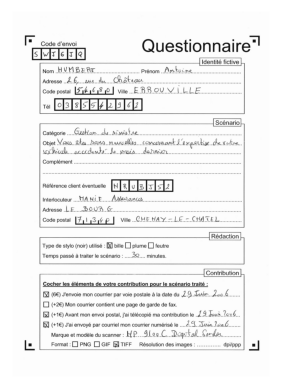

In [46]:
mode="cv2"
# Load the test.png image
img = FE.load_image("test.png",mode=mode, verbose=True)
# Display the image
show_image(img,mode=mode)

crop_patch: mode=cv2 box=(200,400,550,850) size=(350,450) time=0.000379s


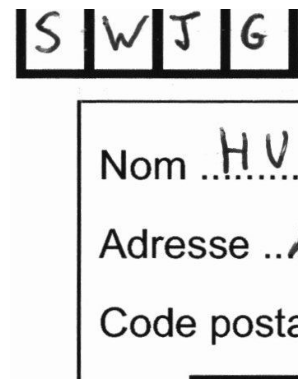

In [48]:
patch = FE.crop_patch(img, (200, 400, 550, 850), mode=mode, verbose=True)
show_image(patch,mode=mode)

convert_to_grayscale: mode=cv2 shape=(450, 350, 3) time=0.000406s


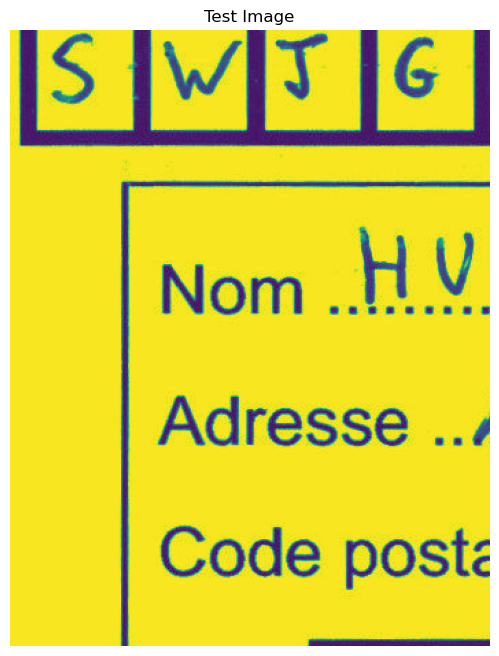

In [49]:
grayscale_patch = FE.convert_to_grayscale(patch, mode=mode, verbose=True)
plot_image(grayscale_patch)

resize_patch: mode=cv2 original_size=((350, 450)) target_size=(128, 128) time=0.008281s


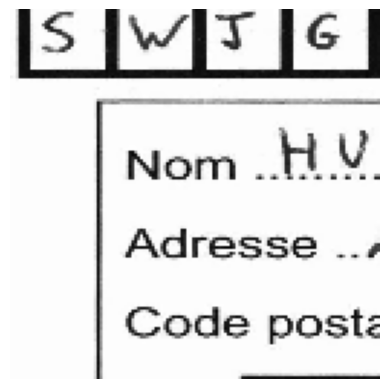

In [50]:
resized_patch, scale_x, scale_y = FE.resize_patch(patch, (128, 128), mode=mode, verbose=True)
show_image(resized_patch,mode=mode)

binarize_patch: mode=cv2 threshold=128 time=0.003897s


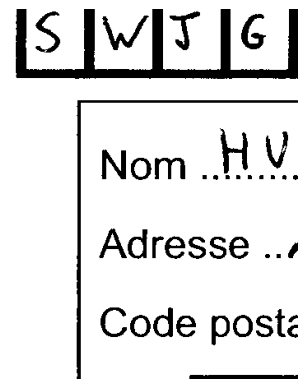

In [51]:
binarized_patch = FE.binarize_patch(grayscale_patch, threshold=128, mode=mode, verbose=True)
show_image(binarized_patch,mode=mode)

# reload

In [ ]:
def reload_modules():
    import importlib
    import src.utils.feature_extraction as FE

    importlib.reload(FE)

    return FE
FE = reload_modules()
def show_image(img,mode='cv2'):
    if mode=='PIL':
        img.show()
    elif mode=='cv2':
        import matplotlib.pyplot as plt
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()